<a href="https://colab.research.google.com/github/dushyantsinghraghav/Visualisation-Tensorflow/blob/main/Convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

First we get the data pizza and steak dataset 
It is availabel on kaggle

In [ ]:
import zipfile
#we download the zipfile of pizzza steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
#Now we unzip the download file
zip_ref=zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()



--2022-02-03 03:41:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 108.177.112.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   178MB/s    in 0.6s    

2022-02-03 03:41:25 (178 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Now we inspect the data and extract the training and test dataset from train & test directory or folder


In [ ]:
#ls pizza_steak
!ls  pizza_steak/train/steak
#this train directory has all the images which will be used for training the convolutional 
#neural networks

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
#Now we import os and walk through the pizza_steak directory to count the no of files
import os 
for dirpath, dirnames,filenames  in os.walk("pizza_steak"):
  print(len(dirnames))
  print("total directroies",len(dirpath))
  print("total no of files",len(filenames))


2
total directroies 11
total no of files 0
2
total directroies 17
total no of files 0
0
total directroies 23
total no of files 750
0
total directroies 23
total no of files 750
2
total directroies 16
total no of files 0
0
total directroies 22
total no of files 250
0
total directroies 22
total no of files 250


In [ ]:
#Now we get the classnames  and it helps to understand the different classes
import pathlib
data_dir=pathlib.Path("pizza_steak/train/")
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))
#Now we print the class names
print(class_names)


['pizza' 'steak']


In [ ]:
#Now we view the image randomly and we use a function for that 
#this image is in either train or test directory depending on which directory we choose
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  #set up the target directory
  target_folder= target_dir +target_class
  #get a random_image path
  random_image= random.sample(os.listdir(target_folder),1)
  #now we read the image and plot it using the matplotlib
  img=mpimg.imread(target_folder +"/" +random_image[0])
  plt.imshow(img)
  plt.title("target_class")
  plt.axis("off")
  print("the shape of image",img.shape)
  return(img)

the shape of image (512, 512, 3)


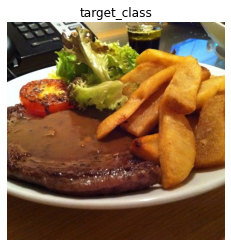

In [ ]:
#Now we call the above function 
img= view_random_image(target_dir="pizza_steak/train/",
                       target_class="steak")

#Now we train the convolutional neural network and we understand the architecture clearly first and then we train a model using tensorflow
where we have convolutional layer and then max pool layer along the activation function relu and then finally in the ouput layer 
we have sigmoid

In [ ]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
#set random_seed
tf.random.set_seed(42)
#Now we preprocess the data and get all the pixel values between 0 and 1
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen =ImageDataGenerator(rescale=1./255)
#Now we setup the train and test directories
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

#Now we import the data from the directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size =(224,224),
                                           class_mode="binary",
                                           seed=42)

#Now we train  the convolutional neural_network using keras
model_1=tf.keras.Sequential([
                             #first we have two convolutional layers and then a maxpool layer
                             tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    activation="relu",
                                                    input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             #Now we create the maxpool layer
                             tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10,3 ,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1,activation="sigmoid")


])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Now we compile the model and then fit the training data 
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Now we fit the training data onto the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 296ms/step - loss: 0.5759 - accuracy: 0.6573 - val_loss: 0.3695 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4202 - accuracy: 0.8113 - val_loss: 0.3583 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4240 - accuracy: 0.8200 - val_loss: 0.3600 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3760 - accuracy: 0.8353 - val_loss: 0.3403 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 14s 290ms/step - loss: 0.3575 - accuracy: 0.8527 - val_loss: 0.3415 - val_accuracy: 0.8580


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

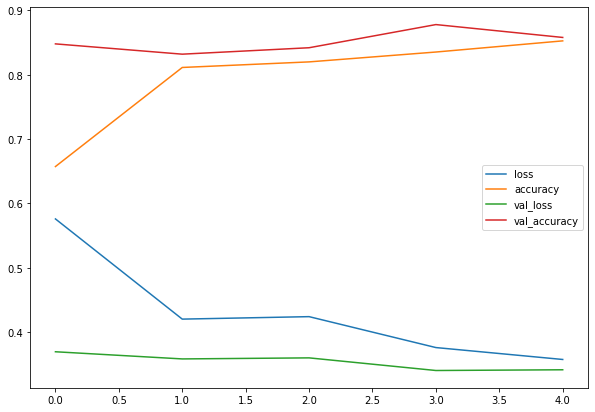

In [ ]:
#Now we evaluate the model
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [ ]:
#Now we plot the validation and training data separately
#lets plot a curve for loss and accuracy for the current model using the function 
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  #Now we plot  loss and history

  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Now we plot the accuracy curve
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="validation_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


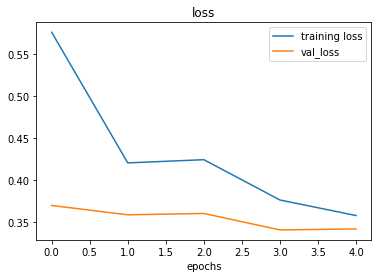

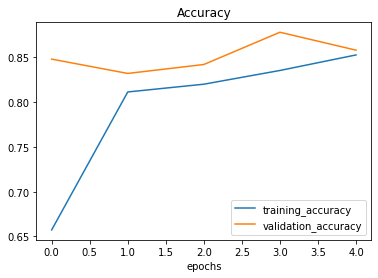

In [ ]:
plot_loss_curves(history_1)

In [ ]:
#Now we adjust the model parameters and they are mainly hyperparameters
#We create anothe model with different values for hyperparameters
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential
model_5=tf.keras.Sequential([
                             Conv2D(filters=10,
                                    kernel_size=3,
                                    strides=1,
                                    padding="valid",
                                    activation="relu",
                                    input_shape=(224,224,3)),
                                    Conv2D(10,3,activation="relu"),
                                    Conv2D(10,3,activation="sigmoid"),
                                    Flatten(),
                                    Dense(1,activation="sigmoid")  #this is the ouput layer
                          
])

In [ ]:
#Now we compile the above model 
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#Now we fit the data on the model_5 and compare it with then above model
history_2=model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)

)

Epoch 1/5
47/47 [==============================] - 13s 254ms/step - loss: 24.8081 - accuracy: 0.5307 - val_loss: 2.7862 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 12s 247ms/step - loss: 0.9419 - accuracy: 0.6573 - val_loss: 0.5576 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 14s 288ms/step - loss: 0.5880 - accuracy: 0.7187 - val_loss: 0.5425 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 12s 245ms/step - loss: 0.5627 - accuracy: 0.7307 - val_loss: 0.5238 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.5464 - accuracy: 0.7600 - val_loss: 0.5171 - val_accuracy: 0.7780


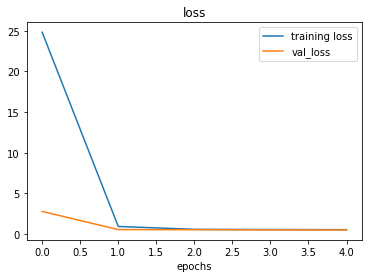

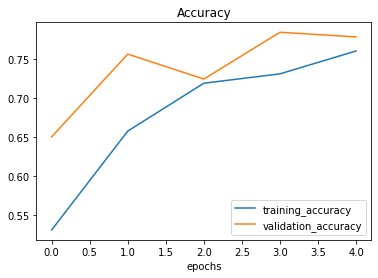

In [ ]:
#Now we plot the curve for model_5 and compare it with model_1
plot_loss_curves(history_2)

In [ ]:
#Data augmentation to get more variety of data 

## Multiclass classification using CNN
Following steps are followed :
1)Become one with the data
2)Preprocess the data 
3)Create a model